In [1]:
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Define the folder where the RBC database is going to be saved
# -------------------------------------------------------------

base_dir = './RBC_database'

# Create a folder for the training, validation and testing data. 
# For each of them, two folders are created, one for the good RBC
# images, and the other for the bad ones.
# --------------------------------------

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_goodRBC_dir = os.path.join(train_dir,'goodRBC')
train_badRBC_dir = os.path.join(train_dir,'badRBC')

validation_goodRBC_dir = os.path.join(validation_dir,'goodRBC')
validation_badRBC_dir = os.path.join(validation_dir,'badRBC')

test_goodRBC_dir = os.path.join(test_dir,'goodRBC')
test_badRBC_dir = os.path.join(test_dir,'badRBC')

In [3]:
# Preprocess the images. The idea here is to create the mini-bacth of images using an
# image generator. Also the images are normalized in such way the maximum intensity is
# equal to 1. 
# ----------

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = True,
        vertical_flip = True)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(85,85),
        batch_size = 64,
        class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(85,85),
        batch_size = 64,
        class_mode = 'binary')

Found 2956 images belonging to 2 classes.
Found 993 images belonging to 2 classes.


In [4]:
# Define the model and the compilation options. 
# ----------------------------------------------

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(85,85,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=1e-4), 
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 83, 83, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxP

In [5]:
# Train the model
# ---------------

history = model.fit_generator(train_generator,
                    steps_per_epoch = 100,
                    epochs = 30,
                    validation_data = validation_generator,
                    validation_steps = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 45s 447ms/step - loss: 0.6123 - acc: 0.6755 - val_loss: 0.5593 - val_acc: 0.6804
Epoch 2/30
100/100 [==============================] - 42s 419ms/step - loss: 0.5264 - acc: 0.6883 - val_loss: 0.4747 - val_acc: 0.6801
Epoch 3/30
100/100 [==============================] - 42s 423ms/step - loss: 0.4695 - acc: 0.7105 - val_loss: 0.4574 - val_acc: 0.7309
Epoch 4/30
100/100 [==============================] - 42s 419ms/step - loss: 0.4560 - acc: 0.7296 - val_loss: 0.4336 - val_acc: 0.7628
Epoch 5/30
100/100 [==============================] - 41s 408ms/step - loss: 0.4441 - acc: 0.7409 - val_loss: 0.4379 - val_acc: 0.7396
Epoch 6/30
100/100 [==============================] - 42s 424ms/step - loss: 0.4399 - acc: 0.7541 - val_loss: 0.4369 - val_acc: 0.7348
Epoch 7/30
100/100 [==============================] - 43s 426ms/step - loss: 0.4266 - acc: 0.7615 - val_loss: 0.4349 - val_acc: 0.7454
Epoch 8

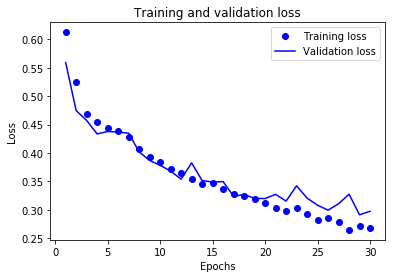

In [6]:
# Display the loss function during the training
# ---------------------------------------------

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

n = len(loss_values)
epochs = range(1, n+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

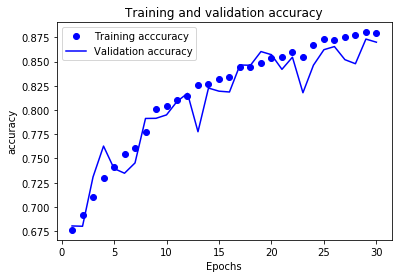

In [7]:
# The accuracy of the model is tested using the testing set of data.
# ------------------------------------------------------------------

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

n = len(acc_values)
epochs = range(1, n+1)

plt.plot(epochs, acc_values, 'bo', label='Training acccuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()


In [8]:
# Finally test the accuracy of the model directly on the testing set of images
# ----------------------------------------------------------------------------

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(85,85),
        batch_size = 20,
        class_mode = 'binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)
print('test_acc : ', test_acc)
print('test_loss : ', test_loss)

Found 986 images belonging to 2 classes.
test_acc :  0.8529411728435308
test_loss :  0.3103454047455084
